# Google Cloud ChatBot with Grounding

## Overview
In this tutorial, we'll build a ChatBot that utilizes data from a Website store that contains URLs Snakemake information as its source. Grounding in this context means ensuring that the model's responses are strictly based on the information available on the website. The data store, which contains information from publicly indexed websites, allows you to specify domains and configure search or recommendation features based on the data collected from these sites. This data includes text, images with metadata, and structured information. For additional details on Agent Builder grounding, please refer to the __[GCP_Grounding](https://github.com/STRIDES/NIHCloudLabGCP/blob/main/notebooks/GenAI/GCP_Grounding.ipynb)__ tutorial. 

## Learning objectives
- Learn to create a search app in Agent Builder.
- Learn to create a Website data store.
- Learn to use an Agent Builder grounding.
                       
## Prerequisites
You must have enabled the Vertex AI, Compute Engine, and Agent Builder APIs.

## Pricing 
__[Google Cloud Pricing Calculator](https://cloud.google.com/products/calculator?hl=en)__ <br>
$0.80 per month based on:<br>
Search Enterprise Edition. Number of requests per month = 100<br>
Search LLM Add-On. Number of requests per month = 100<br>
Data Index. Amount of GiB indexed per month = 5<br>

## Get started

### Create a search app

As the __[GCP_Grounding](https://github.com/STRIDES/NIHCloudLabGCP/blob/main/notebooks/GenAI/GCP_Grounding.ipynb)__ tutorial explains, we need to create an 'Application' under the 'Agent Builder' on the console. Start by searching up 'Agent Builder' on the console.

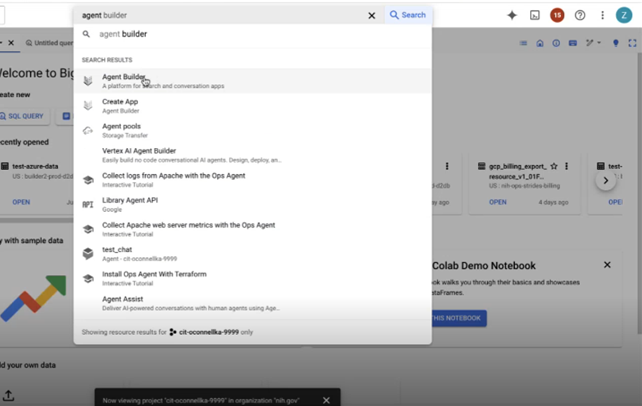

Once you open the 'Agent Builder,' you will see a list of all the apps available to you. Click on 'CREATE APP' to get started.

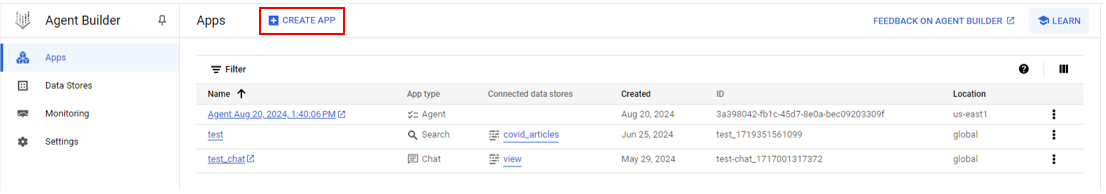

Click on __"SELECT"__ to select an app Search type.

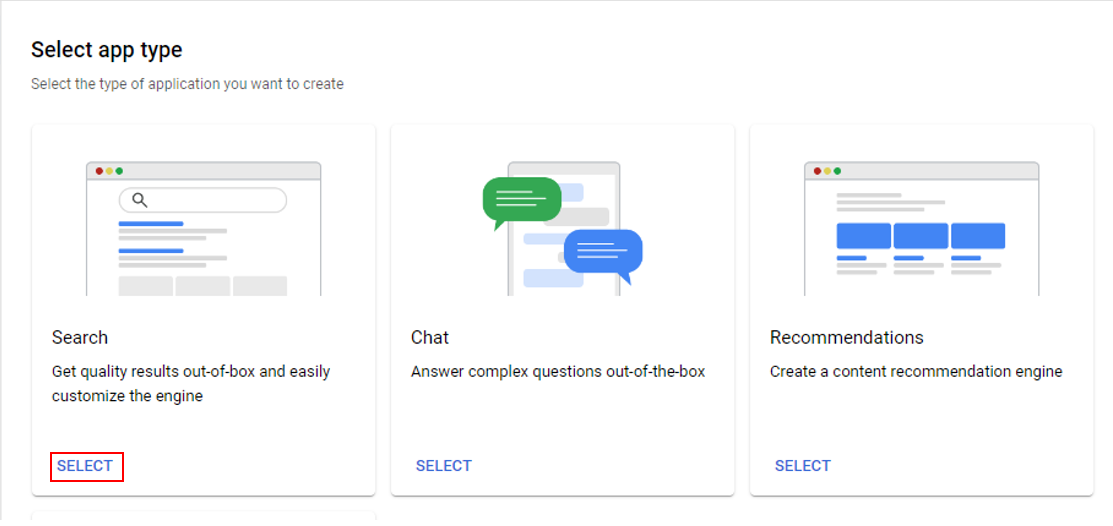

The process of creating an application involves three steps: Type, Configuration, and Data. To set up the Search app configuration, choose the __"Generic"__ content option, enable both the __'Enterprise edition features'__ and __'Advanced LLM features'__, and then provide the application name along with the company or organization name.

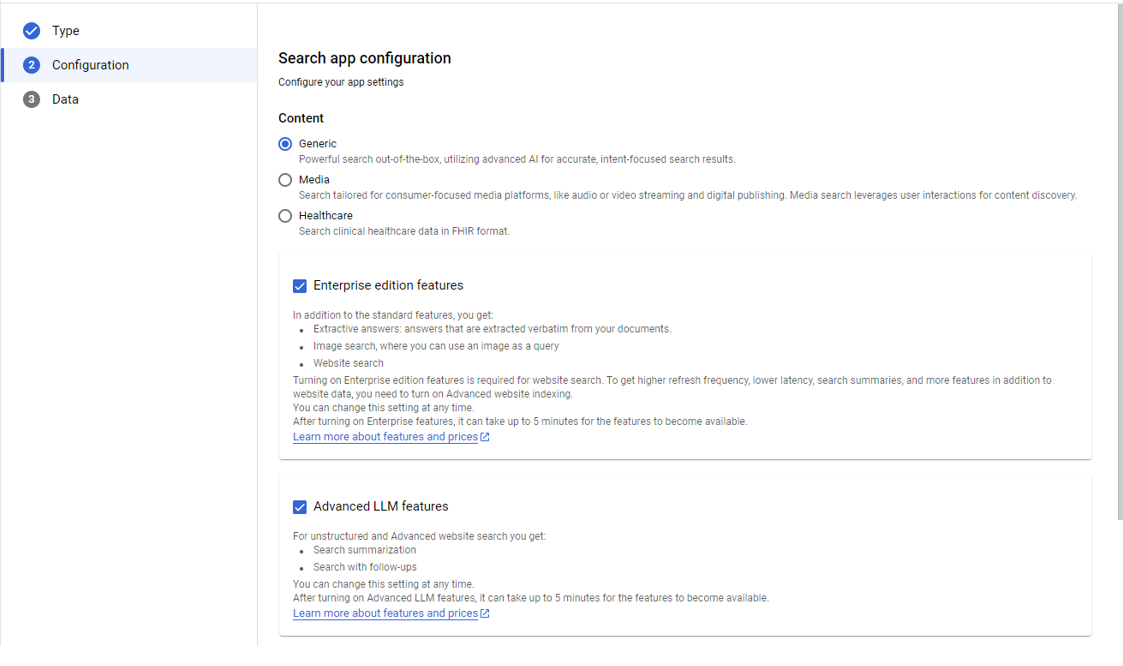

The next step is to create the data store. Click on __'CREATE DATA STORE'__ to proceed.

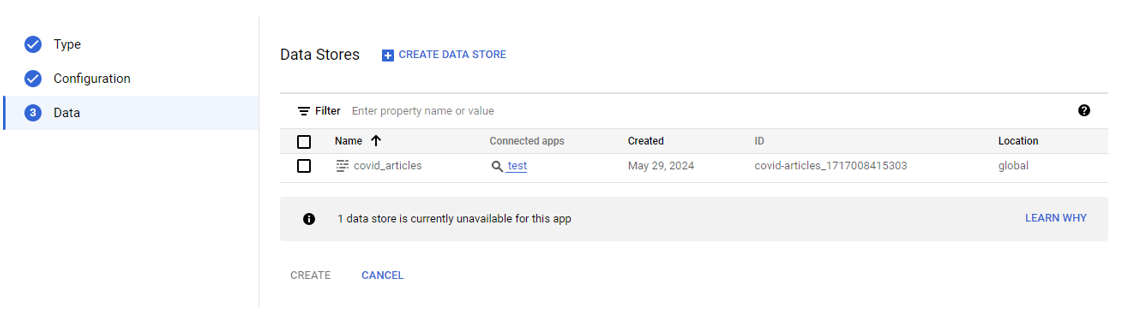

Since we will use Snakemake URLs to extract information for our application, select __'Website Content'__.

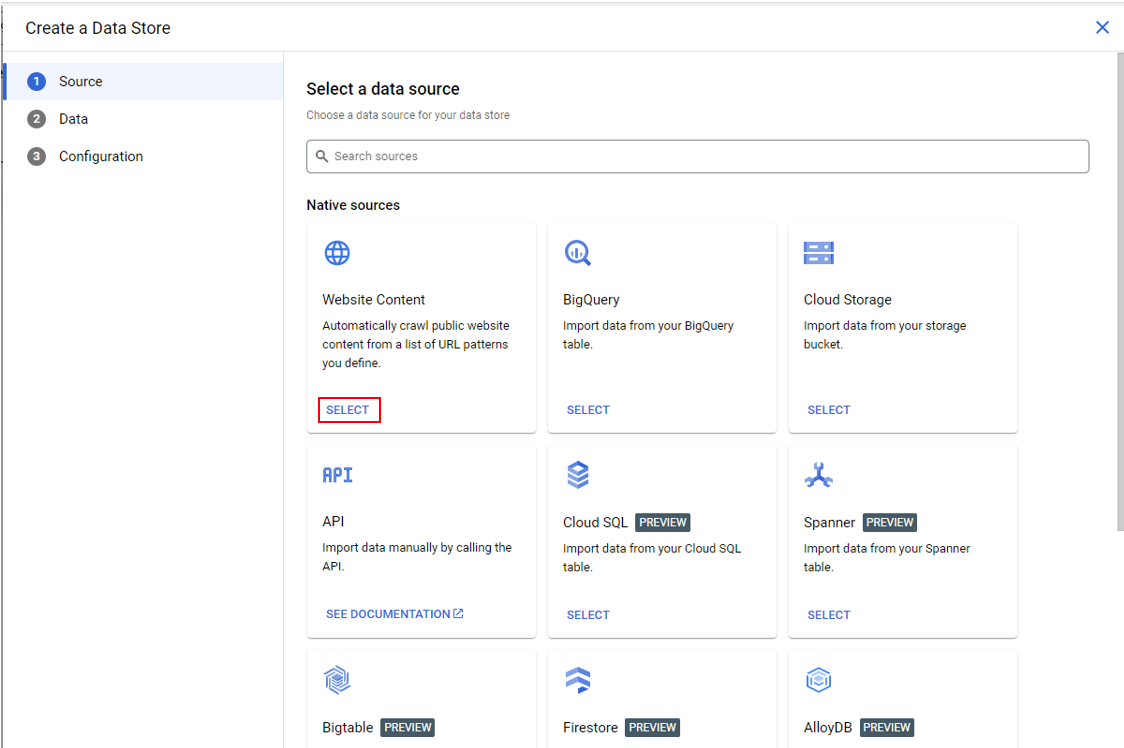

Selecting __'Website Content'__ will prompt you to enter a list of URLs and specify any sites to exclude. It is important to note that all the subdirectories of a domain can be extracted adding at the end of the URL a '__/*__'. i.e. in our case, we are extracting all the webpages that are contained in the "https://snakemake.redthedocs.io/end/stable/*" URL. <br><br>__Note:__ It is crucial not to check the 'Advanced website indexing' option.

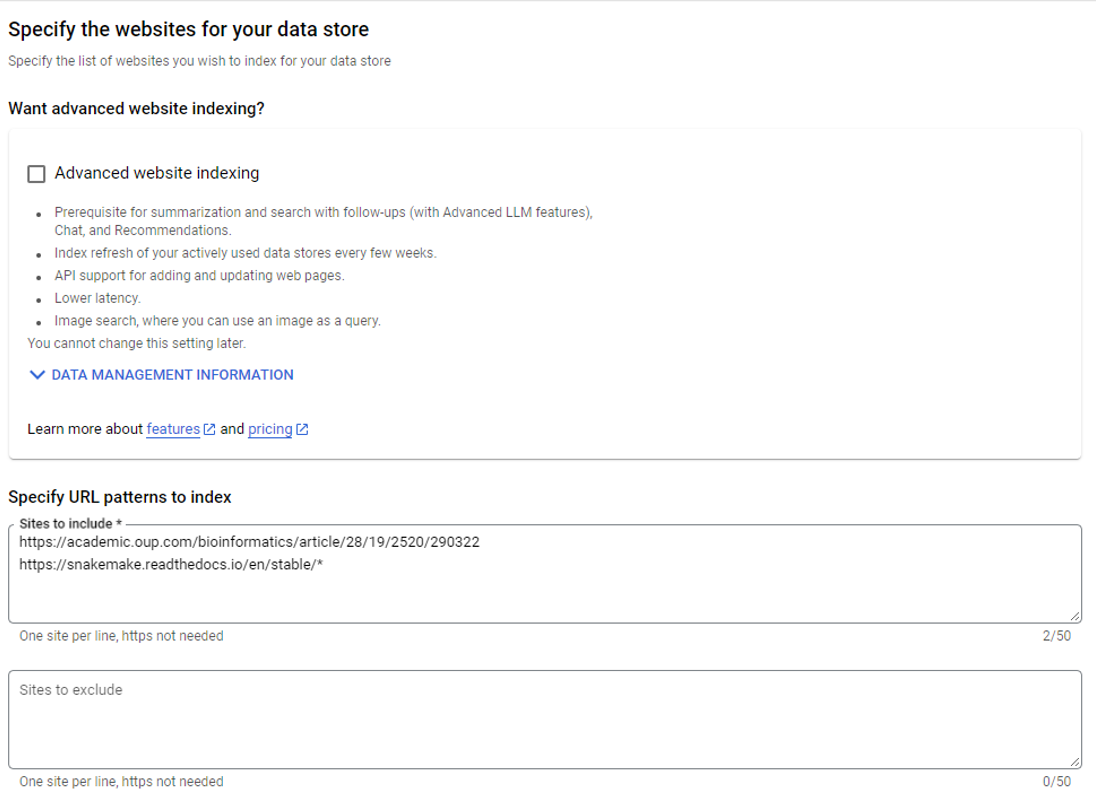

As the final step, you need to assign a name to the data store and click __"CREATE"__.

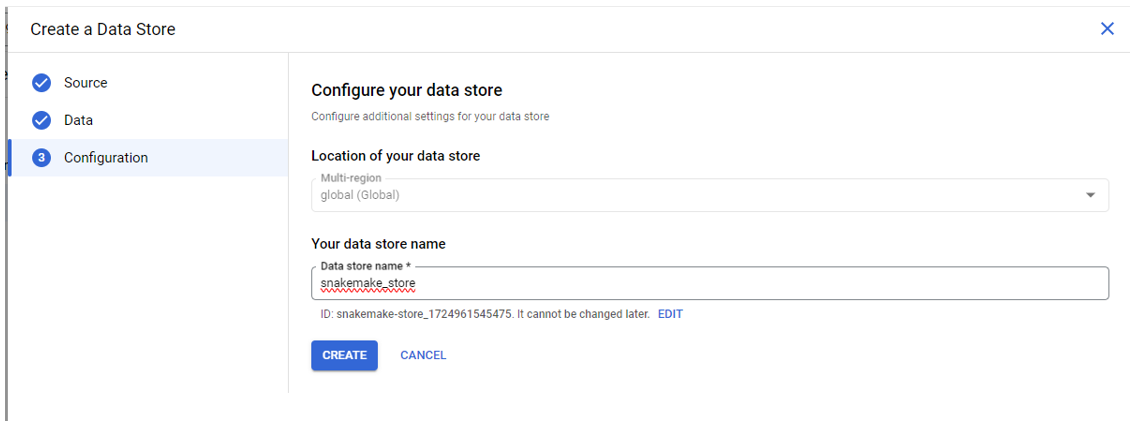

Be sure to copy and save the __'Data Store ID__,' as it will be needed later to configure the grounding tool.

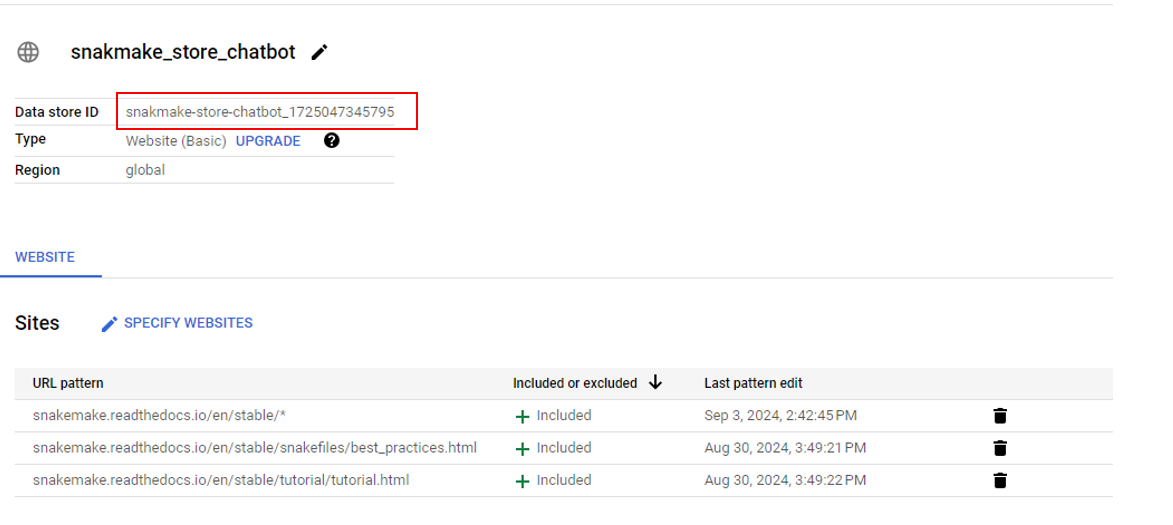

Once the application is created, the next step is to set up the ChatBot. To do this, click on the three-line "hamburger" icon in the upper left corner of the window to view all available GCP products. Then, select __'Vertex AI'__ followed by __'Chat'__. 

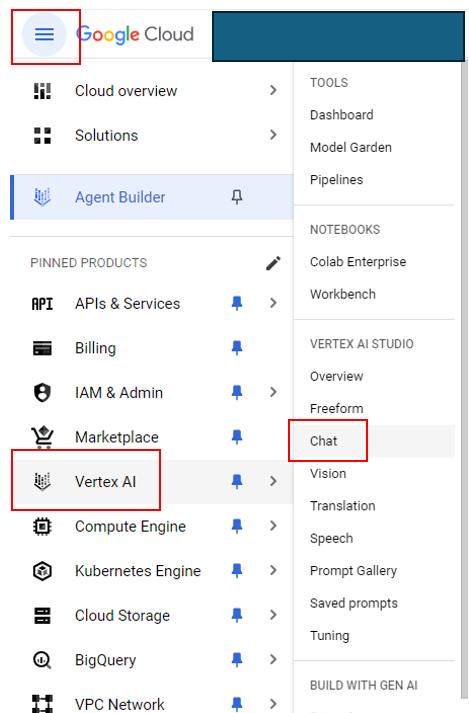

The Chat selection offers three options, and you can begin using the ChatBot by editing the System instructions. To do this, click on __Edit__ in the top right corner.

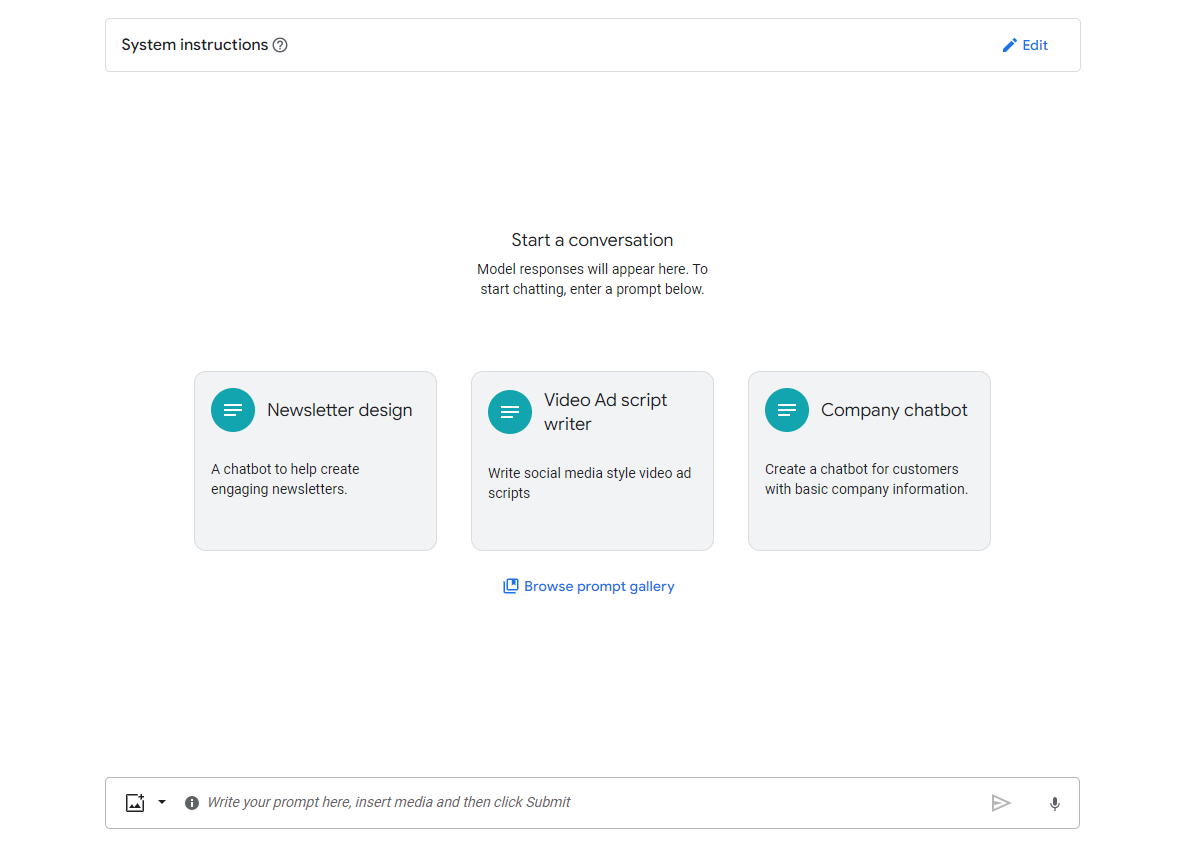

The next step is to select the parameters that we want to be used for our model, check the __'Ground model responses'__ and then __'Customize'__. Again, to learn specifically about Grounding, you can review the __[GCP_Grounding](https://github.com/STRIDES/NIHCloudLabGCP/blob/main/notebooks/GenAI/GCP_Grounding.ipynb)__ tutorial.  

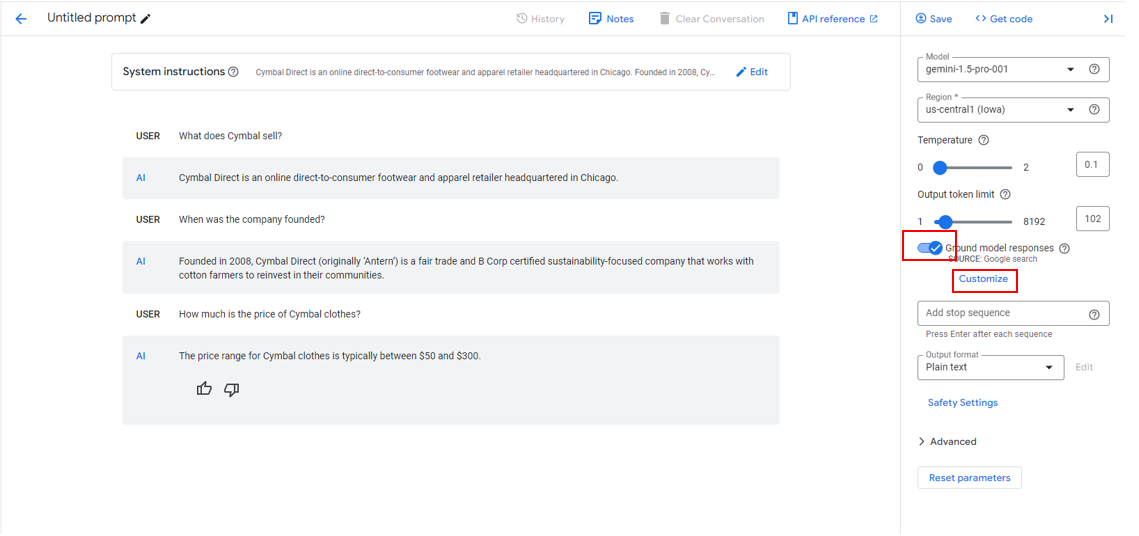

Select __'Vertex AI search'__ as the __'Grounding source'__, and in the __'Vertex AI datastore path'__ field, input the project ID, location, collections, and datastore ID in this format: __'projects/{PROJECT_ID}/locations/global/collections/default_collection/dataStores/{DATA_STORE_ID}'__. Once you've entered the required information, simply click save. You can retrieve the Project ID and Data Store ID by executing the following Python code:

In [ ]:
PROJECT_ID = '<PROJECT_ID>'
DATA_STORE_ID = '<DATA_STORE_ID>'

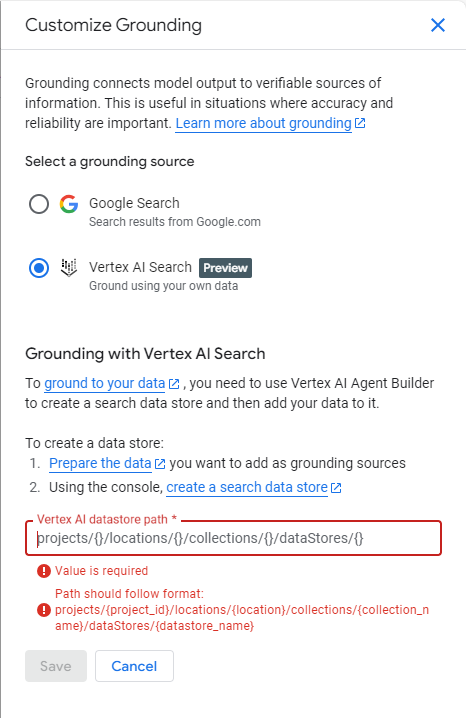

If you submit a prompt to the BotChat and receive an error, it's likely that the Vertex AI datastore path is incorrect. Once you have the correct path to connect the ChatBot to the datastore, you can prompt the application with questions related to the specific domain information stored in the datastore. 

While both Retrieval-Augmented Generation (RAG) and Grounding are techniques used in natural language processing (NLP), they serve different purposes and operate at different levels. While RAG enhance the quality and accuracy of text generation by incorporating relevant information from external knowledge sources, Grounding ensures that the generated text is consistent with the information in the data soource. Both techniques are crucial for building robust and reliable NLP systems. RAG helps to improve the factual accuracy and coherence of generated text, while grounding ensures that the text is consistent with the real world and avoids hallucinations.

In our case, we asked for a conversion of a short Python script to Snakemake code. 

As an example, the following Python script is used to be converted into Snakemake code:

```
from clollections import Counter

def count_nucleotides(dna_sequence):  #Counts the frequency of each nucleotide in a DNA sequence
    return Counter(dna_sequence)
    
dna = "ATGCATGCATGCATGC"

counts = count_nucleotides(dna)
print(counts)

```


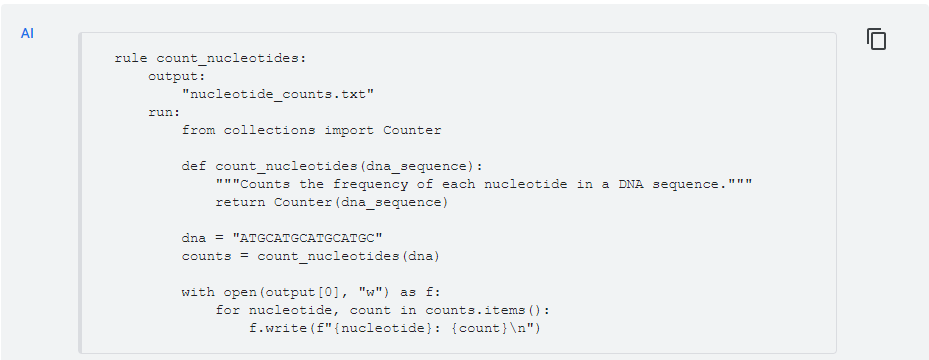

In this particular case, the prompt is requesting to the application to convert a simple one-line Bash script to Snakemake. 

Would you convert the following Bash script to Snakemake:

```
#!/usr/bin/env bash 

fastqc -t 23 *.fastq.gz -o /path/to/output/dir && multiqc /path/to/output/dir -o /path/to/output/dir
```

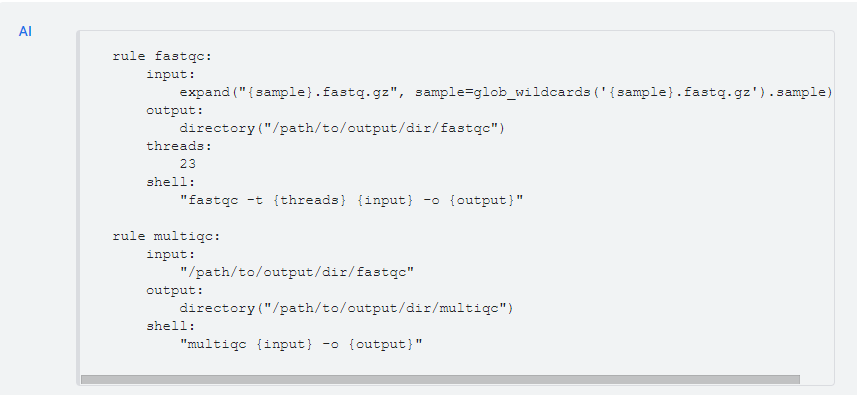